<a href="https://colab.research.google.com/github/aayushi-0407/ML-Projects/blob/main/spotiify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [ ]:
data = pd.read_csv("/content/Spotify_Song_Attributes.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13330 entries, 0 to 13329
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         13330 non-null  object 
 1   artistName        13330 non-null  object 
 2   msPlayed          13330 non-null  float64
 3   genre             11361 non-null  object 
 4   danceability      12636 non-null  float64
 5   energy            12636 non-null  object 
 6   key               12636 non-null  object 
 7   loudness          12636 non-null  object 
 8   mode              12636 non-null  object 
 9   speechiness       12636 non-null  object 
 10  acousticness      12636 non-null  float64
 11  instrumentalness  12636 non-null  float64
 12  liveness          12635 non-null  float64
 13  valence           12635 non-null  float64
 14  tempo             12635 non-null  float64
 15  type              12635 non-null  object 
 16  id                12635 non-null  object

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11360 entries, 1 to 13329
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         11360 non-null  object 
 1   artistName        11360 non-null  object 
 2   msPlayed          11360 non-null  float64
 3   genre             11360 non-null  object 
 4   danceability      11360 non-null  float64
 5   energy            11360 non-null  object 
 6   key               11360 non-null  object 
 7   loudness          11360 non-null  object 
 8   mode              11360 non-null  object 
 9   speechiness       11360 non-null  object 
 10  acousticness      11360 non-null  float64
 11  instrumentalness  11360 non-null  float64
 12  liveness          11360 non-null  float64
 13  valence           11360 non-null  float64
 14  tempo             11360 non-null  float64
 15  type              11360 non-null  object 
 16  id                11360 non-null  object

In [ ]:
data.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234.0,british orchestra,0.475,0.13,7.0,-17.719,1.0,0.051,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610.0,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.117,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058.0,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949.0,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
5,(L)only Child,salem ilese,2237969.0,alt z,0.645,0.611,8.0,-5.925,0.0,0.137,...,0.2370,0.645,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0


In [ ]:
data.describe()

,msPlayed,danceability,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.136000e+04,11360.000000,11360.000000,11360.000000,11360.000000,11360.000000,11360.000000,1.136000e+04,11360.000000
mean,1.538986e+06,0.602269,0.356857,0.148209,0.174450,0.436761,119.092255,2.042332e+05,3.916901
std,5.632159e+06,0.158702,0.332619,0.308798,0.131422,0.242942,28.888371,7.275009e+04,0.385442
min,0.000000e+00,0.000000,0.000002,0.000000,0.024900,0.000000,0.000000,1.002700e+04,0.000000
25%,1.402555e+05,0.507000,0.051375,0.000000,0.096200,0.241000,97.427000,1.635000e+05,4.000000
50%,2.694530e+05,0.623000,0.239000,0.000024,0.119000,0.411000,118.779000,1.960400e+05,4.000000
75%,1.220797e+06,0.715000,0.655000,0.022500,0.207000,0.620000,139.026500,2.314000e+05,4.000000
max,1.583671e+08,0.976000,0.996000,0.993000,0.964000,0.986000,236.196000,1.847210e+06,5.000000


In [ ]:
numeric_data = list(data.describe().columns)

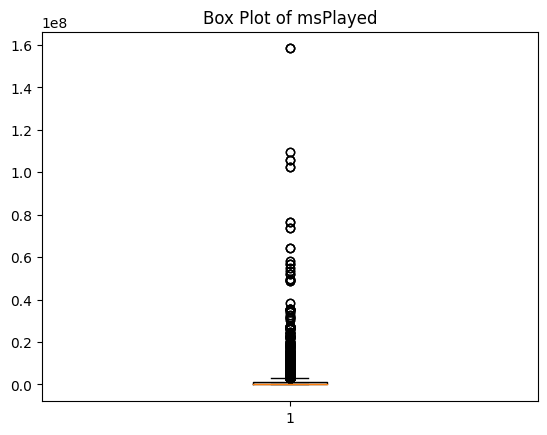

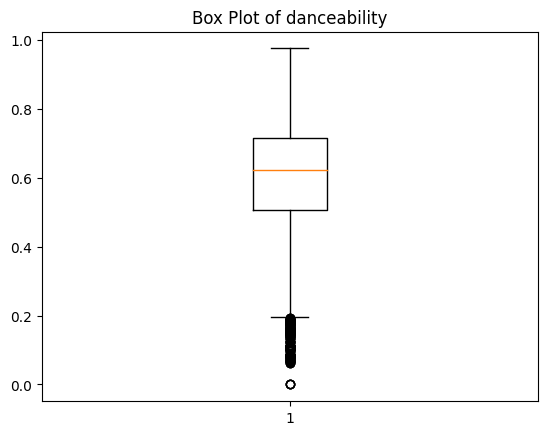

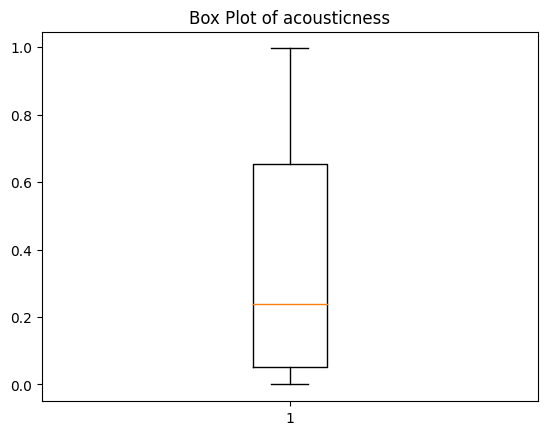

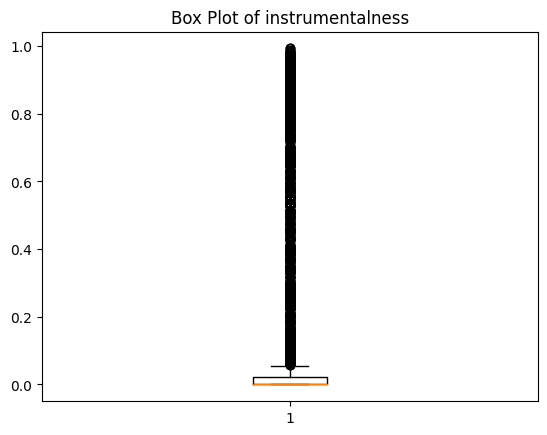

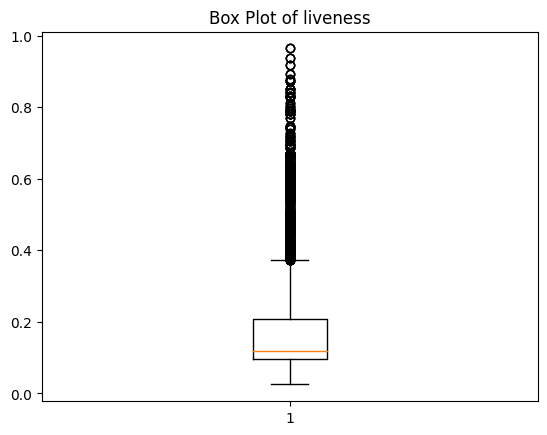

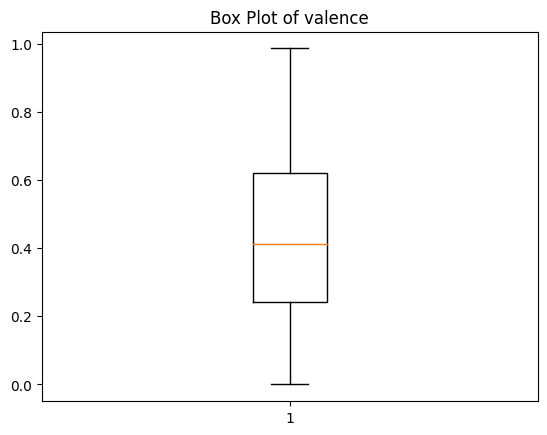

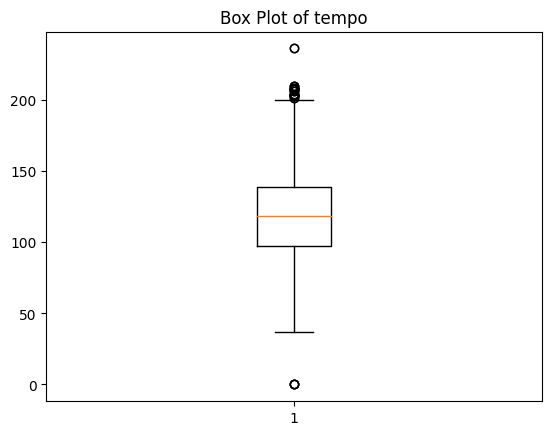

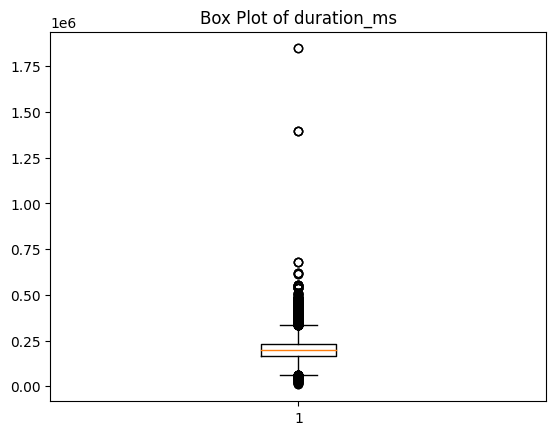

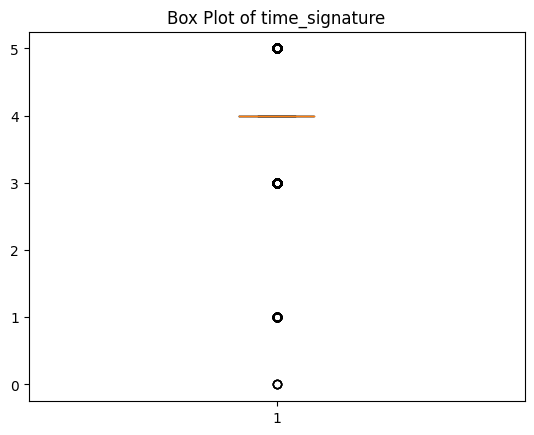

In [ ]:
for columns in numeric_data:
  plt.boxplot(data[columns])
  plt.title(f"Box Plot of {columns}")
  plt.show()

In [ ]:
def remove_outliers_zscore(df, threshold=3):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())
    return df[(z_scores < threshold).all(axis=1)]

In [ ]:
data = remove_outliers_zscore(data)

In [ ]:
data.shape

(10659, 22)

In [ ]:
data['artistName'].value_counts()

blackbear                    135
Lauv                         124
The Neighbourhood            112
Kato                         109
Linkin Park                   98
                            ... 
Steve Aoki                     2
Lemaitre                       2
Kayba                          2
Hailee Steinfeld               2
London Symphony Orchestra      2
Name: artistName, Length: 1753, dtype: int64

<Axes: >

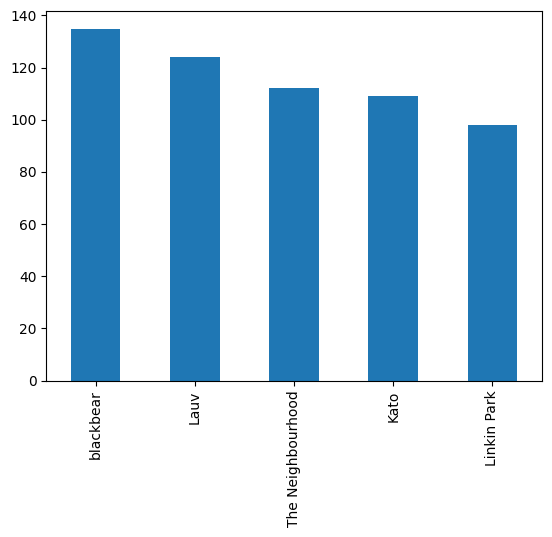

In [ ]:
top_artist = data['artistName'].value_counts().head(5)
top_artist.plot(kind='bar')

<Axes: >

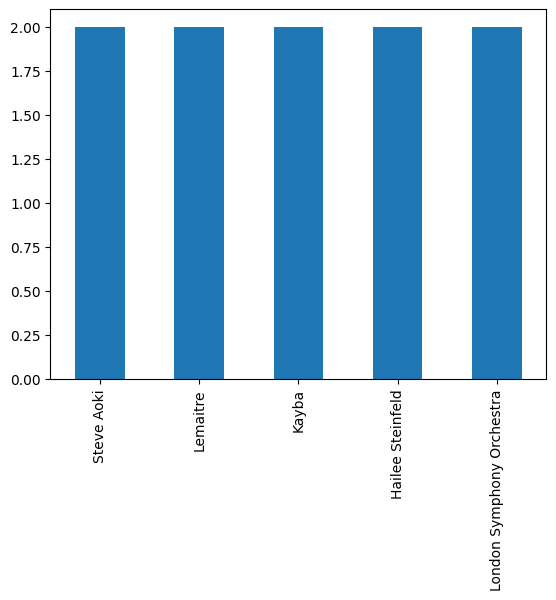

In [ ]:
top_artist = data['artistName'].value_counts().tail(5)
top_artist.plot(kind='bar')

<Axes: >

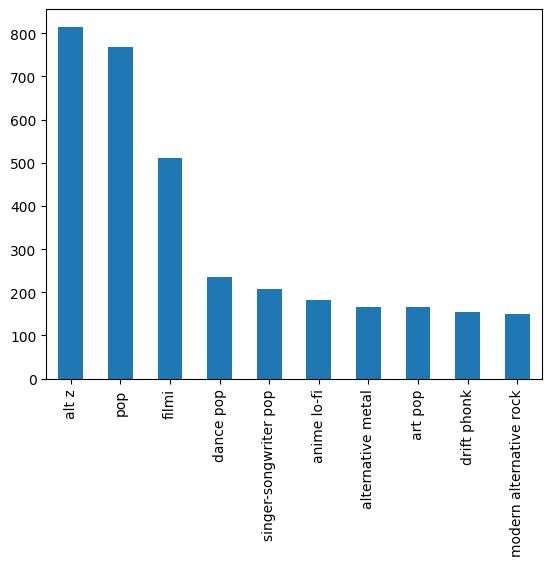

In [ ]:
top_genre = data['genre'].value_counts().head(10)
top_genre.plot(kind = 'bar')

<Axes: xlabel='genre'>

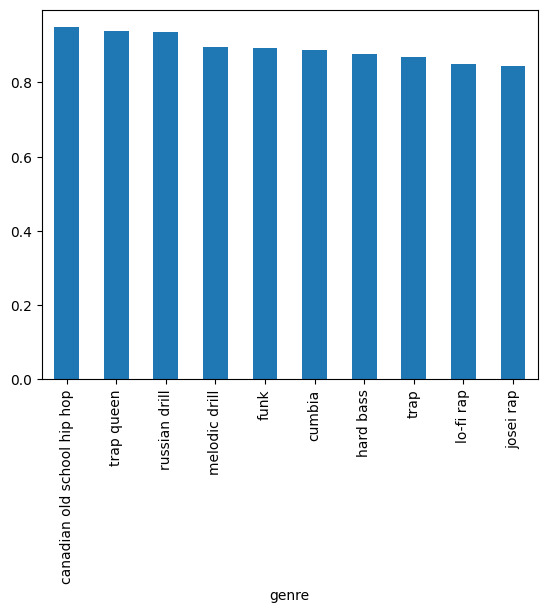

In [ ]:
genre_group = data.groupby('genre')['danceability'].mean()
top_genre_by_energy = genre_group.sort_values(ascending=False).head(10)
top_genre_by_energy.plot(kind = 'bar')

<Axes: xlabel='genre'>

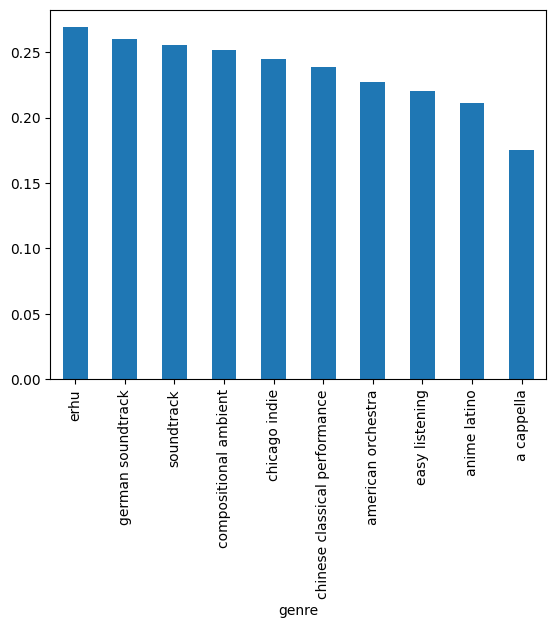

In [ ]:
genre_group = data.groupby('genre')['danceability'].mean()
top_genre_by_energy = genre_group.sort_values(ascending=False).tail(10)
top_genre_by_energy.plot(kind = 'bar')

In [ ]:
genre_group = data.groupby('artistName')['loudness'].mean()
top_genre_by_energy = genre_group.sort_values(ascending=False).head(10)
top_genre_by_energy.plot(kind = 'bar')

TypeError: ignored

In [ ]:
genre_group = data.groupby('genre')['loudness'].mean()
top_genre_by_energy = genre_group.sort_values(ascending=False).head(10)
top_genre_by_energy.plot(kind = 'bar')

In [ ]:
for columns in numeric_data:
  plt.hist(data[columns],bins=15)
  plt.title(columns)
  plt.xlabel(columns)
  plt.ylabel("Frequency")
  plt.show()
#provides frequency of diffenrent values of datat set
#values ranging from 0.0-0.1 has highest frequency of more than 9000

In [ ]:
for columns in numeric_data:
  plt.figure(figsize=(8,6))
  sns.violinplot(data[[columns]])
  plt.ylabel('values')
  plt.title('Violin plot')

In [ ]:
all_track_name = ' '.join(data['trackName'].astype(str))

In [ ]:
all_track_name

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_track_name)

In [ ]:
plt.figure(figsize = (20,10))
plt.imshow(wordcloud ,  interpolation='bilinear')

In [ ]:
sns.pairplot(data)

In [ ]:
plt.show()